In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

%matplotlib inline

# Data lookup

## Clients

In [2]:
clients = pd.read_csv('data/clients.csv')

In [3]:
clients.shape

(99995, 4)

In [4]:
clients.head(10)

,client_id,gender,city,birthyear
0,1a47d62dddacc03fe90c15652f7ae1a4,M,Other,1990.0
1,9cb909f701d25d548e953bff81192b56,F,Other,1969.0
2,d5da0f5b841b4f83383202807995027a,M,Other,1976.0
3,13ed7f16810b17b8cee6de834ac79a48,F,Moscow,1966.0
4,215fe3ea7d5bf0415e5504e2a7f33551,F,Other,1988.0
5,f37a3565c6b19888c6a70fb606411577,F,Moscow,1987.0
6,956875adb8eb120e9121a68e2ccac61d,F,Other,1997.0
7,6aa7be76ebbe2a18ca0de9a9bc133970,F,Other,1948.0
8,e2f21dcfe01938a1bf74dc993715c22f,F,Other,1984.0
9,d89495d527574eb62ef276bca91c2e80,F,Other,1952.0


In [5]:
print(f"Number of unique clients: {clients.client_id.nunique()}")

Number of unique clients: 99995


In [6]:
clients.groupby('gender').count()

,client_id,city,birthyear
gender,,,
F,59280,59280,58356
M,40360,40360,39735


In [7]:
clients.groupby('city').count()

,client_id,gender,birthyear
city,,,
Moscow,5414,5409,5365
Other,81207,80887,79763
St. Petersburg,13374,13344,13091


In [8]:
list(sorted(clients.groupby('birthyear')['client_id'].count().items()))

[(1900.0, 30),
 (1901.0, 1),
 (1909.0, 1),
 (1911.0, 1),
 (1912.0, 1),
 (1913.0, 1),
 (1914.0, 1),
 (1915.0, 2),
 (1917.0, 2),
 (1918.0, 2),
 (1919.0, 4),
 (1920.0, 1),
 (1921.0, 1),
 (1922.0, 1),
 (1923.0, 6),
 (1925.0, 5),
 (1926.0, 8),
 (1927.0, 19),
 (1928.0, 18),
 (1929.0, 9),
 (1930.0, 36),
 (1931.0, 27),
 (1932.0, 42),
 (1933.0, 49),
 (1934.0, 54),
 (1935.0, 82),
 (1936.0, 121),
 (1937.0, 190),
 (1938.0, 220),
 (1939.0, 256),
 (1940.0, 266),
 (1941.0, 294),
 (1942.0, 194),
 (1943.0, 149),
 (1944.0, 203),
 (1945.0, 316),
 (1946.0, 566),
 (1947.0, 653),
 (1948.0, 665),
 (1949.0, 927),
 (1950.0, 903),
 (1951.0, 939),
 (1952.0, 1071),
 (1953.0, 1020),
 (1954.0, 1204),
 (1955.0, 1303),
 (1956.0, 1311),
 (1957.0, 1354),
 (1958.0, 1479),
 (1959.0, 1510),
 (1960.0, 1643),
 (1961.0, 1626),
 (1962.0, 1649),
 (1963.0, 1503),
 (1964.0, 1533),
 (1965.0, 1443),
 (1966.0, 1440),
 (1967.0, 1432),
 (1968.0, 1489),
 (1969.0, 1649),
 (1970.0, 1800),
 (1971.0, 1892),
 (1972.0, 2011),
 (1973.0, 1951

In [9]:
clients['age'] = 2020-clients['birthyear']

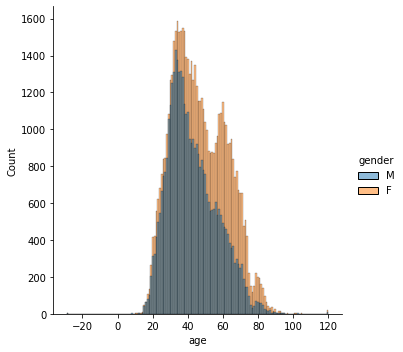

In [10]:
sns.displot(clients, x='age', hue='gender')

In [11]:
clients.groupby('gender')['age'].count()/len(clients)*100.0

gender
F    58.358918
M    39.736987
Name: age, dtype: float64

# Materials

In [12]:
materials = pd.read_csv('data/materials.csv')

In [13]:
materials.head()

,material,hier_level_1,hier_level_2,hier_level_3,hier_level_4,vendor,is_private_label,is_alco
0,35cbdf61de9e19c8b417327aaef14c88,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,9eed45f71360b4b1e2590637467220e5,212a38db0ddcd009f1e164cc8483485c,0,0
1,c0b0bf24d4ec71da3d304f761ec555d8,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,de2eb747e0896c050905a6b635ab800a,9b0b6c7d55413ad3b67761b7b125b534,0,0
2,f0fc5e654a81a7c4b8ba8d7c26546e14,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,8a969031832c535daf96e0c2aed8e814,9b0b6c7d55413ad3b67761b7b125b534,0,0
3,353693e64fb5f9e2d29746d7fe6edf1e,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,b58f7d184743106a8a66028b7a28937c,4c0dc012ebb679a18b244c53c6f59b5a,a3c8be149d718771e892619bd310b961,0,0
4,5d9e0b4302ce95448cae72165ff4cf5b,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,b58f7d184743106a8a66028b7a28937c,4c0dc012ebb679a18b244c53c6f59b5a,a3c8be149d718771e892619bd310b961,0,0


In [14]:
materials.groupby("hier_level_1")['material'].count()

hier_level_1
FOOD       57847
NONFOOD    47762
Name: material, dtype: int64

In [15]:
materials.groupby("hier_level_2")['material'].count()

hier_level_2
02e74f10e0327ad868d138f2b4fdd6f0    2175
03afdbd66e7929b125f8597834fa83a4    2117
072b030ba126b2f4b2374f342be9ed44     167
093f65e080a295f8076b1c5722a46aa2    2085
14bfa6bb14875e45bba028a21ed38046     746
17e62166fc8586dfa4d1bc0e1742c08b    1091
182be0c5cdcd5072bb1864cdee4d3d6e    1845
19ca14e7ea6328a42e0eb13d585e4c22     991
1c383cd30b7c298ab50293adfecb7b18    1934
1f0e3dad99908345f7439f8ffabdffc4      60
1ff1de774005f8da13f42943881c655f    6059
2838023a778dfaecdc212708f721b788    1224
3295c76acbf4caaed33c36b1b5fc2cb1    3303
33e75ff09dd601bbe69f351039152189    1338
3416a75f4cea9109507cacd8e2f2aefc     306
34173cb38f07f89ddbebc2ac9128303f    1133
37693cfc748049e45d87b8c7d8b9aacd    2639
3c59dc048e8850243be8079a5c74d079     172
44f683a84163b3523afe57c2e008bc8c    1930
4e732ced3463d06de0ca9a15b6153677    1679
6364d3f0f495b6ab9dcf8d3b5c6e0b01    2370
642e92efb79421734881b53e1e1b18b6     317
6512bd43d9caa6e02c990b0a82652dca     836
66f041e16a60928b05a7e228a89c3799    3208
67c

In [16]:
materials.groupby("hier_level_3")['material'].count()

hier_level_3
000871c1fc726f0b52dc86a4eeb027de     17
012d9fe15b2493f21902cd55603382ec    651
02f039058bd48307e6f653a2005c9dd2      9
03924fb32bcc6248036e209a716e3339     92
03a3655fff3e9bdea48de9f49e938e32    126
                                   ... 
fbfe5ba2ce3309f522c335e949435612    186
fd00d3474e495e7b6d5f9f575b2d7ec4    262
fd4d801731725513a4d77aa9bb35534b    153
fea16e782bc1b1240e4b3c797012e289    247
ffc58105bf6f8a91aba0fa2d99e6f106    413
Name: material, Length: 391, dtype: int64

In [17]:
materials.groupby("hier_level_4")['material'].count()

hier_level_4
001d2d283b7f3c7378e363313b483e51    508
002fc5b5b4131c6ea6412ec21999589e     50
00567f2f2aa24a951b33f2e63f7a298e     15
007496ff404d0a1d4e5c993492d4b99a     55
0079c916e4207b3b87ba54cd0565ecc0     68
                                   ... 
ffa0829899912d2575fe413fdb53086d    129
ffa247ae4a097dc6a7e45ed492a5f069     85
ffa5a75bfd08cbe4a6a3b3328d5876ac     54
ffe99c1281934cdb4f1de9a44c8ea757      1
fff7988c2a0b3a775308c2c12e556e73     27
Name: material, Length: 2006, dtype: int64

(array([2.3752e+04, 1.3540e+03, 3.5100e+02, 1.6400e+02, 7.8000e+01,
        3.8000e+01, 2.2000e+01, 1.7000e+01, 9.0000e+00, 1.0000e+01,
        5.0000e+00, 3.0000e+00, 5.0000e+00, 5.0000e+00, 1.0000e+00,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1.  ,   9.98,  18.96,  27.94,  36.92,  45.9 ,  54.88,  63.86,
         72.84,  81.82,  90.8 ,  99.78, 108.76, 117.74, 126.72, 135.7 ,
        144.68, 153.66, 162.64, 171.62, 180.6 , 189.58, 198.56, 207.54,
        216.52, 225.5 , 234.48, 243.46, 252.44, 261.42, 270.4 , 279.38,
        288.36, 297.34, 306.32

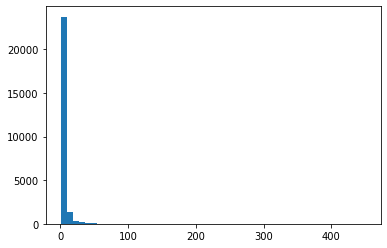

In [18]:
plt.hist(materials.groupby(['hier_level_4', 'vendor']).count().reset_index()['material'], bins=50)

In [19]:
from collections import Counter

Counter(materials.groupby(['hier_level_4', 'vendor']).count().reset_index()['material']).most_common()

[(1, 9830),
 (2, 5429),
 (3, 2988),
 (4, 1935),
 (5, 1203),
 (6, 879),
 (7, 608),
 (8, 500),
 (9, 380),
 (10, 284),
 (11, 223),
 (12, 204),
 (13, 155),
 (14, 138),
 (15, 109),
 (16, 101),
 (18, 70),
 (17, 70),
 (19, 63),
 (20, 51),
 (22, 46),
 (23, 39),
 (21, 39),
 (24, 35),
 (25, 33),
 (28, 25),
 (26, 23),
 (31, 22),
 (29, 22),
 (27, 22),
 (33, 18),
 (36, 18),
 (30, 16),
 (35, 15),
 (32, 15),
 (38, 14),
 (34, 13),
 (44, 12),
 (37, 11),
 (42, 8),
 (40, 8),
 (51, 8),
 (45, 8),
 (39, 7),
 (46, 7),
 (48, 5),
 (43, 5),
 (41, 5),
 (49, 4),
 (72, 4),
 (64, 4),
 (60, 4),
 (54, 3),
 (62, 3),
 (75, 3),
 (57, 3),
 (82, 3),
 (56, 3),
 (47, 3),
 (59, 3),
 (52, 3),
 (50, 3),
 (126, 2),
 (69, 2),
 (80, 2),
 (119, 2),
 (84, 2),
 (95, 2),
 (178, 2),
 (143, 2),
 (55, 2),
 (65, 2),
 (58, 2),
 (79, 2),
 (92, 2),
 (61, 2),
 (53, 2),
 (68, 2),
 (87, 2),
 (78, 1),
 (112, 1),
 (90, 1),
 (120, 1),
 (67, 1),
 (101, 1),
 (136, 1),
 (127, 1),
 (144, 1),
 (184, 1),
 (261, 1),
 (71, 1),
 (89, 1),
 (450, 1),
 (267,

In [20]:
materials['material'].nunique()

105609

# Plants

In [21]:
plants = pd.read_csv('data/plants.csv')

In [24]:
plants

,plant,plant_type,city
0,95b09698fda1f64af16708ffb859eab9,HM,St. Petersburg
1,926abae84a4bd33c834bc6b981b8cf30,HM,St. Petersburg
2,ae2bac2e4b4da805d01b2952d7e35ba4,HM,St. Petersburg
3,0e7e3cf0ded4d9db8b376b317c007f99,HM,St. Petersburg
4,540bd55a2cf295b8ea9cd78650e89d03,HM,St. Petersburg
...,...,...,...
383,8178a650c360ce1a3fe81858f0e75760,SM,Other
384,238d77348d954fdd455aabb09575f2d0,SM,Other
385,6e1acaeb838a890e6570284f73e1d00f,SM,Other
386,7fc3ee9aad33036cc501b2ca7c163fc1,SM,Other


# Transactions

In [22]:
transactions = pd.read_parquet('data/transactions.parquet')

In [23]:
transactions.head(20)

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
0,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,004,90fca68123e692a005a4edeadd94b2f2,232cfe8b28970434f685b737737b26d4,2.000,146.98,0
1,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,003,90fca68123e692a005a4edeadd94b2f2,12ec64451b8e426db16f3f05ea770901,1.000,249.99,1
2,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,012,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.000,47.99,1
3,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,013,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.000,47.99,1
4,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,011,90fca68123e692a005a4edeadd94b2f2,571c6d3b559db8445e05265649eb30ab,2.000,53.98,1
5,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,001,90fca68123e692a005a4edeadd94b2f2,76608b1b1d38384fcac3e2b14e6ec0c9,2.000,64.78,1
6,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,006,90fca68123e692a005a4edeadd94b2f2,86069eddeab2b94b00eca5801628c879,0.728,65.51,0
7,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,010,90fca68123e692a005a4edeadd94b2f2,cd8645ab842a98332560a07d137aed24,1.000,36.99,1
8,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,007,90fca68123e692a005a4edeadd94b2f2,f6f07df28266b03cb7822b62abf0a385,2.000,72.99,1
9,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,005,90fca68123e692a005a4edeadd94b2f2,b726b2ec8d0643d38e29d96733153dd4,2.000,51.98,1


In [79]:
transaction_sums = transactions.groupby(['client_id', 'chq_date'])[['client_id', 'chq_date', 'sales_count', 'sales_sum']]

In [82]:
transaction_sums = transaction_sums.sum().reset_index()

In [93]:
transaction_sums['day'] = (transaction_sums['chq_date'] - transaction_sums['chq_date'].min())

In [94]:
transaction_sums['day'] = transaction_sums['day'].apply(lambda x: x.days)

In [102]:
transaction_sums = transaction_sums.sort_values(['client_id', 'day'])

In [106]:
transaction_sums['interval'] = transaction_sums['day'] - transaction_sums.groupby('client_id')['day'].shift(1)

In [109]:
transaction_sums = transaction_sums.dropna(subset=['interval'])

In [132]:
transaction_freqs = transaction_sums.groupby(['client_id'])[['interval']].median()
# transaction_sums.groupby(['client_id'])[['interval']].std()


(array([3.9730e+03, 5.1420e+03, 6.4680e+03, 5.7850e+03, 6.1050e+03,
        1.1178e+04, 4.1650e+03, 4.4920e+03, 3.2990e+03, 3.1360e+03,
        5.8340e+03, 2.5320e+03, 2.6080e+03, 1.8810e+03, 1.6890e+03,
        2.8870e+03, 1.7650e+03, 1.6500e+03, 1.1520e+03, 1.1390e+03,
        1.6880e+03, 9.4100e+02, 1.3710e+03, 8.8100e+02, 7.7700e+02,
        1.1980e+03, 6.1100e+02, 7.6200e+02, 6.5000e+02, 5.5400e+02,
        7.5800e+02, 4.3100e+02, 4.3600e+02, 4.3300e+02, 4.2500e+02,
        5.8900e+02, 3.4300e+02, 3.5100e+02, 2.7600e+02, 3.0100e+02,
        4.9300e+02, 2.1600e+02, 3.1300e+02, 2.1400e+02, 2.0700e+02,
        3.6700e+02, 1.9600e+02, 2.3200e+02, 1.6900e+02, 1.6100e+02,
        2.7000e+02, 1.7300e+02, 1.7400e+02, 1.2700e+02, 1.1500e+02,
        2.0700e+02, 1.3000e+02, 1.7900e+02, 1.1800e+02, 1.1100e+02,
        1.4500e+02, 1.0700e+02, 1.0800e+02, 1.1400e+02, 9.6000e+01,
        1.1900e+02, 9.6000e+01, 1.0100e+02, 6.9000e+01, 7.2000e+01,
        1.0500e+02, 5.2000e+01, 8.5000e+01, 4.50

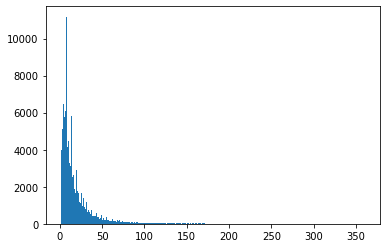

In [133]:
plt.hist(transaction_freqs.reset_index()['interval'], bins=300)

Optimal estimated frequency = 5-7 days

In [103]:
.clients_freqs = 
for client_id, client_table = transaction_sums

,client_id,chq_date,sales_count,sales_sum,day
0,0000d48a8891cd462fdf01ea861ec53e,2016-10-31,27.866,1655.0,27
1,0000d48a8891cd462fdf01ea861ec53e,2016-11-20,31.268,2475.0,47
2,0000d48a8891cd462fdf01ea861ec53e,2016-12-01,35.750,4481.0,58
3,0000d48a8891cd462fdf01ea861ec53e,2016-12-10,17.698,2030.0,67
4,0000d48a8891cd462fdf01ea861ec53e,2016-12-13,15.914,1502.0,70
...,...,...,...,...,...
2480209,fffc477269ae5f219e39aa51fa7abb81,2017-05-14,29.628,3882.0,222
2480210,fffc477269ae5f219e39aa51fa7abb81,2017-06-20,72.678,6661.0,259
2480211,fffd3e78e3ea6bf00aee1372efc09dad,2016-10-11,12.000,1213.0,7
2480212,fffd3e78e3ea6bf00aee1372efc09dad,2016-12-03,4.208,220.0,60


In [158]:
transactions.head()

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
0,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,004,90fca68123e692a005a4edeadd94b2f2,232cfe8b28970434f685b737737b26d4,2.0,146.98,0
1,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,003,90fca68123e692a005a4edeadd94b2f2,12ec64451b8e426db16f3f05ea770901,1.0,249.99,1
2,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,012,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.0,47.99,1
3,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,013,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.0,47.99,1
4,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,011,90fca68123e692a005a4edeadd94b2f2,571c6d3b559db8445e05265649eb30ab,2.0,53.98,1


In [163]:
transactions.groupby(['client_id', 'material'])['sales_sum'].sum().reset_index().groupby('material').mean().max()

sales_sum    41045.39
dtype: float64

In [ ]:
transactions.groupby(['client_id', 'material'])['sales_sum'].sum()

In [178]:
sampled = transactions.sample(n=100000)

In [179]:
sampled

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
23782045,2aedc6778c608f32c5049443774ae09f,b705667936f5d49b801c56aa43bed5ea,2017-06-23,002,bcd24d74c42cfde45421cb27559d9637,50463522511dbc678e54e5cbc7bb4de7,1.000,18.89,1
23523804,171eb7daf63786831d9ab5ef5f01f4cd,7cd86ecb09aa48c6e620b340f6a74592,2017-07-11,004,351a9cf76c1f90942f071d968cfdd879,89e6c75c93404b58427cfa47277fd748,1.000,163.00,0
5133506,af167fa303ae8449fddc3d8127a3169c,7d9a22c8598378bd6bb67584611867f7,2016-12-16,010,a4ed8d7cb4466b6a8f0eca32a8396e28,485eeb1d9a575ab58784ef4b253adac0,1.000,98.99,1
7060972,d5066d7c28378417012a91ea67a0f824,6a2095bc178dbb0ba00e8fd5f10306b2,2016-12-30,012,202bc5726021808edcc2227ae2c07c66,bd65c45606ff2dcee7fe948e79c6c7ae,1.000,77.99,1
22301674,3ef7d62eb984d4fc62052ba1ea3ebc92,158939b55b7981a76550ce43c178d8d0,2017-06-16,007,344b69a9e6c56b5126072c67b09a1f42,92a7d196ffb138a84b82e53ce926d618,1.000,101.49,0
...,...,...,...,...,...,...,...,...,...
9307990,517c38693624acdfa575bae00179a230,95b09698fda1f64af16708ffb859eab9,2017-02-28,003,da98fe98955e3b024df14660fca89769,c8fa3becd13b8d45156ac55ab82d93a5,0.490,172.52,0
21461606,a4f5dffbb07960946e363f8a10d605ca,785ee201dc63daae3aecb2c7cbae60d3,2017-06-09,016,baf6c2fae79ea54f70048a2d9926719c,eb23a7cc9c97e7cb82c9e69fdaaefe46,0.162,18.94,0
17965166,13bf9b4455ccd15bd32dc12fc153748d,d39934ce111a864abf40391f3da9cdf5,2017-05-20,001,961f895e9dfeaf3d5bafb90c62eef547,6278f48a43fb0a23036b3a11c92e726c,1.104,60.71,1
8354703,1f4c029a6c2d6a3b008e1c4812f7ffe8,24a41dfc0b09c248bbc23b5e1ffc16d8,2017-05-13,028,ab739468feb1a857edc7e33fea2b07de,05936c11414616023d17f06b344bbe64,1.000,132.64,1


In [56]:
sentences = transactions.groupby(['client_id', 'chq_id'])['material'].apply(lambda x: list(x.values))

In [57]:
sentences

client_id                         chq_id                          
0000d48a8891cd462fdf01ea861ec53e  06c8917969c640e22d94ef876d195ebd    [ecd2c5edd6cd83e6c2dbdeaabaea75f1, 5a008f40c57...
                                  07296c20aef47baa760bbecef9e5458b    [6278f48a43fb0a23036b3a11c92e726c, 8c577928331...
                                  229bd1cf3168e342447c451594b1a24d    [49634c5bef39b4402e0ca16eed2a0292, 8caf8d9e46f...
                                  23732c893fa67ebb0dc5a30f701512f2    [fd0633d3d3c02b1c6682333639671934, 43aafe6b2ab...
                                  272d955e9fa15e17c0f9089bdf6283cd    [206369cebefabd05f198602ee6999c8e, f4c2bdcf27d...
                                                                                            ...                        
fffc477269ae5f219e39aa51fa7abb81  da4a5469540e86268327d544b4f66474    [f5931ca6ad521bf8a8ce04af43788172, 97b233a43d7...
                                  eb52b8b32c1af950aee99357c13b4bb3    [0953e52ac8803902dc6b0e

In [58]:
dates = transactions.groupby(['client_id', 'chq_id'])['chq_date'].min()

In [59]:
dates

client_id                         chq_id                          
0000d48a8891cd462fdf01ea861ec53e  06c8917969c640e22d94ef876d195ebd   2017-06-25
                                  07296c20aef47baa760bbecef9e5458b   2017-04-20
                                  229bd1cf3168e342447c451594b1a24d   2017-07-17
                                  23732c893fa67ebb0dc5a30f701512f2   2017-07-06
                                  272d955e9fa15e17c0f9089bdf6283cd   2017-08-31
                                                                        ...    
fffc477269ae5f219e39aa51fa7abb81  da4a5469540e86268327d544b4f66474   2017-05-14
                                  eb52b8b32c1af950aee99357c13b4bb3   2017-06-20
fffd3e78e3ea6bf00aee1372efc09dad  631f77285180657dd00b5051ebad22ae   2017-03-03
                                  65a48d8c83eff22f5ccab0cd3319b3c5   2016-10-11
                                  cfd98a3011c3907c7614efbcac693d7e   2016-12-03
Name: chq_date, Length: 2964775, dtype: datetime64[ns

In [60]:
sentences = pd.concat((sentences, dates), axis=1).reset_index()

In [61]:
sentences = sentences.sort_values(['client_id', 'chq_date'])

In [62]:
sentences['interval'] = sentences['chq_date'] - sentences.groupby('client_id')['chq_date'].shift(1)

In [63]:
sentences = sentences.dropna()

In [64]:
sentences['interval'] = sentences['interval'].apply(lambda x: x.days)

In [80]:
sentences = sentences.reset_index(drop=True)

In [116]:
samples = sentences[:100000]

In [ ]:
sentences.shape[0]

In [117]:
samples

,client_id,chq_id,material,chq_date,interval
0,0000d48a8891cd462fdf01ea861ec53e,d3968d3d1e6000521f9c18149755321f,"[12774fb6f027eae7b33ac36b980afd36, c69fec1e746...",2016-11-20,20
1,0000d48a8891cd462fdf01ea861ec53e,4bca6963a265bac7529bafe1949b33c6,"[d9cb8a928d5ef97c7fc08e16078c47a6, 66c563ba5e7...",2016-12-01,11
2,0000d48a8891cd462fdf01ea861ec53e,ccde7a7ff20aeb4e0e16f7ceb0c4a7e2,"[07009cbc4d67731ae1cdd957e6d04071, 441f83db20d...",2016-12-10,9
3,0000d48a8891cd462fdf01ea861ec53e,2a4f1975d20e88b7a49a121a89d2a109,"[fcebe6003aab4c3a8c1d9ccdc3ef7bd1, 8ccb7b4d7fa...",2016-12-13,3
4,0000d48a8891cd462fdf01ea861ec53e,8c945a30922ecad0a826b2b5f3823024,[ad1afc08c5f185aead8e10ab805ab3b6],2016-12-27,14
...,...,...,...,...,...
99995,095525f7ebdd4429292bc1cff9655bcc,c08b851b486a239018354bd72e42d578,"[9c8af54d8abde6b87cea2264ccfd9208, a43f383b275...",2017-03-24,0
99996,095525f7ebdd4429292bc1cff9655bcc,838128d7ed9d2525eeee175ec64ff8ae,"[b75147feae4cf8ec07fb5f2cef855def, 1accaece89a...",2017-03-25,1
99997,095525f7ebdd4429292bc1cff9655bcc,e95c0e7adce2a71c05dd69d14b084cce,"[501ca9e91ba1059f0e1c586d8adfb969, 1cbaaeb2212...",2017-03-25,0
99998,095525f7ebdd4429292bc1cff9655bcc,17c34c12467a1c79fad8edf163e3f935,"[b75147feae4cf8ec07fb5f2cef855def, 129977c27ff...",2017-03-29,4


In [135]:
PRED_INTERVAL = 31

def get_target_for_row(i, data):
    start_date = data.iloc[i]['chq_date']
    client_id = data.iloc[i]['client_id']
    shifted = data.iloc[i+1:]
    condition = (shifted['chq_date'] < start_date + pd.Timedelta(days=PRED_INTERVAL))
    sliced = shifted[condition]
    return list(set(chain.from_iterable(sliced['material'].values)))

def get_targets(data):
    return [get_target_for_row(i, data) for i in range(data.shape[0])]

def get_sample_for_row(i, data):
    return list(data['material'][:i+1].values)
    
def get_samples(data):
    return [get_sample_for_row(i, data) for i in range(data.shape[0])]

In [137]:
%%time
X = sentences.groupby('client_id').apply(get_samples)

Exception ignored in: <bound method tqdm.__del__ of 0it [7:35:16, ?it/s]>
Traceback (most recent call last):
  File "/home/daniil/skoltech/hackathons/lenta/env/lib/python3.6/site-packages/tqdm/std.py", line 1090, in __del__
    self.close()
  File "/home/daniil/skoltech/hackathons/lenta/env/lib/python3.6/site-packages/tqdm/notebook.py", line 258, in close
    self.sp(bar_style='success')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'
Exception ignored in: <bound method tqdm.__del__ of   0%|<bar/>| 0/1000 [14:43<?, ?it/s]>
Traceback (most recent call last):
  File "/home/daniil/skoltech/hackathons/lenta/env/lib/python3.6/site-packages/tqdm/std.py", line 1090, in __del__
    self.close()
  File "/home/daniil/skoltech/hackathons/lenta/env/lib/python3.6/site-packages/tqdm/notebook.py", line 255, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


CPU times: user 1min 38s, sys: 484 ms, total: 1min 38s
Wall time: 1min 38s


In [138]:
%%time
y = sentences.groupby('client_id').apply(get_targets)

CPU times: user 38min 15s, sys: 4.06 s, total: 38min 19s
Wall time: 38min 13s


[[['12774fb6f027eae7b33ac36b980afd36',
   'c69fec1e746d8845b15756e3a1ea281c',
   '9f30a2a717a8c463249346c63110eb0d',
   '0b6ddbaa254a17d54d72885b0bf32acc',
   '441f83db20dab8cbdd080b53307836e2',
   '7357504e0819edd50de4b8e434e8f870',
   '684eb191f93f40d13c42a0e4becbe107',
   'c27c7391acfb6c120c91ba33690cbd4a',
   '76608b1b1d38384fcac3e2b14e6ec0c9',
   'ca544f2ea6030dae031adc5a72dde275',
   'd92ec2148af7accaf5fe43f79c07c3f6',
   '282b0e7ab804794b06ffbfaa5a061bb2',
   'caf09da1123f7a68c4f708c01275dec0',
   '7dc7080d4ac652e8afcfa83e9f32b0c3',
   'f87d099dab45340326f542077ba405d4']],
 [['12774fb6f027eae7b33ac36b980afd36',
   'c69fec1e746d8845b15756e3a1ea281c',
   '9f30a2a717a8c463249346c63110eb0d',
   '0b6ddbaa254a17d54d72885b0bf32acc',
   '441f83db20dab8cbdd080b53307836e2',
   '7357504e0819edd50de4b8e434e8f870',
   '684eb191f93f40d13c42a0e4becbe107',
   'c27c7391acfb6c120c91ba33690cbd4a',
   '76608b1b1d38384fcac3e2b14e6ec0c9',
   'ca544f2ea6030dae031adc5a72dde275',
   'd92ec2148af7accaf5f

In [149]:
data = pd.concat((X, y), axis=1).reset_index()

In [ ]:
data.to_csv('data/dataset')

In [ ]:
train_data = 

In [152]:
from model import *

/home/daniil/skoltech/hackathons/lenta/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/daniil/skoltech/hackathons/lenta/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/daniil/skoltech/hackathons/lenta/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/daniil/skoltech/hackathons/lenta/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a sy

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`